# Анализ компьютерных игр

### Описание проекта


Перед нами данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Для начала загрузим все нужные библиотеки**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st

import warnings
warnings.simplefilter(action='ignore')

**Откроем датасет**

In [2]:
df=pd.read_csv('/datasets/games.csv')

In [3]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


*На первый взгляд, пропусков в начале данных не так много, всего на трех последних столбцах. Для большего понимания значении в датасете применим info() и describe(). Все столбцы нужно перевести на нижний регистр*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*Похоже, в данных немало пропусков и типы данных не совпадают со значениями... Есть работка...*

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


*В данных что-то не то: начиная со столбца NA_sales до Other_sales слишком много подозрительных нулей в квартилях, стандартных велечинах*

### Предобработка данных

#### Для начала переведем столбцы на нижний регистр

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
df=df.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 
                      'NA_sales': 'na_sales', 'EU_sales':'eu_sales', 'JP_sales': 'jp_sales', 
                      'Other_sales': 'other_sales', 'Critic_Score':'critic_score', 
                      'User_Score':'user_score', 'Rating':'rating'})

In [8]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Теперь значения в столбцах тоже переведем на нижний регистр

In [9]:
df['name']=df['name'].str.lower()
df['platform']=df['platform'].str.lower()
df['genre']=df['genre'].str.lower()

#### Проверим на наличие пропусков

In [10]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

*Вот оно, в пяти колонках есть пропуски. В основном пропуски в данных с рейтингами, возможно, данные были потеряны от выгрузки, ведь тип данных тоже несоответствует значениям. Самое большое количество в Critic_Score.
Два пропуска в жанре и названии, надеюсь это две разные строчки, так как можно по названию определить жанр, а с названием еще поработаем...*


In [11]:
# check
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

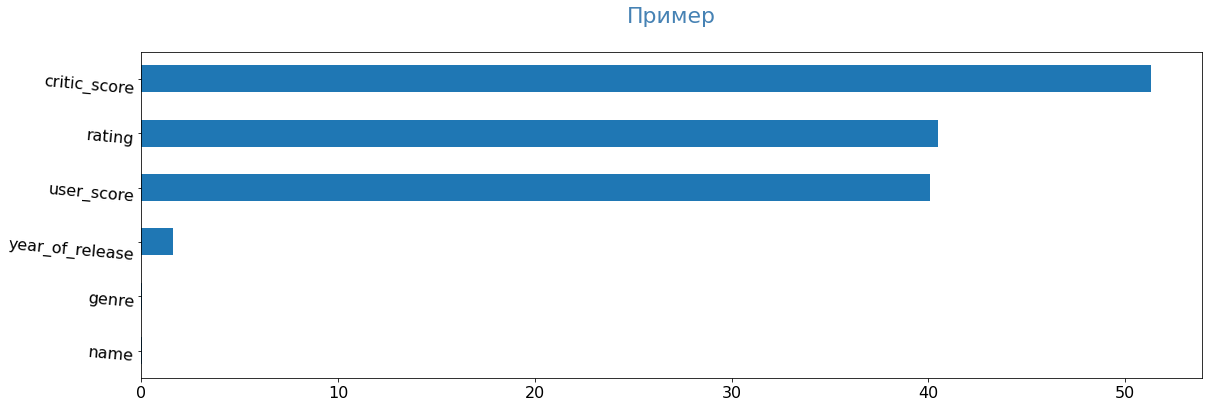

In [12]:
pass_value_barh(df)

**Проверим столбец с жанром и заполним пропуски**

Чтобы увидеть в каких строках есть отсутствующие значения заменим их строчным значением 'Nan'

In [13]:
df['genre']=df['genre'].fillna(value='NaN')
daf=df.query('genre=="NaN"')
daf

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как я и пологала, одни и те же пропуски в названии и жанре игры. Так как, эти данные в ручную заполнить не получится, думаю можно их удалить. Такие пропуски могут возникать по техническим факторам: возможно, пропуски возникли при выгрузке данных. 

In [14]:
df=df.dropna(subset=['genre', 'name'])
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

**Проверим названия игр на дубликаты**

In [15]:
df['name'].duplicated().sum()

5154

Как много дубликатов, однако...

In [16]:
duplicated_names = df[df['name'].duplicated()].head(20) #результат — датафрейм с дубликатами
display(duplicated_names) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,call of duty: black ops ii,x360,2012.0,shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,call of duty: modern warfare 3,ps3,2011.0,shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,call of duty: black ops,ps3,2010.0,shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M
55,call of duty: modern warfare 2,ps3,2009.0,shooter,4.99,3.64,0.38,1.60,94.0,6.3,M
57,grand theft auto iv,ps3,2008.0,action,4.76,3.69,0.44,1.61,98.0,7.5,M
59,super mario 64,ds,2004.0,platform,5.01,3.07,1.25,0.97,NaN,NaN,NaN
69,call of duty: ghosts,ps3,2013.0,shooter,4.10,3.63,0.38,1.25,71.0,2.6,M
99,call of duty: black ops 3,xone,2015.0,shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN


Вот они, все дубликаты). Нужно проверить несколько наименовании, возможно, игра одна, а год ее релиза разный.

In [17]:
defe=df.query('name=="grand theft auto v"')
defe

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,M
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,M
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M
165,grand theft auto v,xone,2014.0,action,2.81,2.19,0.00,0.47,97.0,7.9,M
1730,grand theft auto v,pc,2015.0,action,0.39,0.69,0.00,0.09,96.0,7.9,M


Все понятно, название игры одно, а год релиза и платформы разные. Значит оставим как есть.

***Поищем дубликаты в сумме параметров и оставим первое значение:***

In [18]:
#duplicated=df.duplicated(subset=['name', 'platform', 'year_of_release'], keep='last').sum()
#display(duplicated)
duplicateRows = df[df.duplicated(['name', 'platform', 'year_of_release'])]
display(duplicateRows)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,madden nfl 13,ps3,2012.0,sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [20]:
df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Удалили повторяющиеся строки в категориальных столбцах

**Теперь проверим, столбец с годом выпуска**

In [21]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Как мы посчитали ранее в столбце с годом релиза 269 пропусков. Так как это исторические данные из открытых источников, при импорте данных могли возникнуть ошибки, что и привело к пропускам. Так как вручную заполнять эти строки долго и мучительно, заменим пропуски на -1, чтобы в последующем тип данных совпадал. Потом изменим тип данных.

In [22]:
df['year_of_release']=df['year_of_release'].fillna(value='-1')
df['year_of_release']=df['year_of_release'].astype(int)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

**Обработаем пропуски в столбце rating**

Ищем уникальные значения

In [23]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

*Так как, в столбце Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Похоже, что каждая буква соответвует определенной возрастной категории. Мы не можем вручную запонять 6764 значении, поэтому заполним пропуски -1, чтобы совпадал тип данных*

In [24]:
df['rating']=df['rating'].fillna(value='-1')
duf=df.query('rating=="-1"')
duf

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,-1
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,-1
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,-1
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,-1
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,-1
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,-1
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,-1
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,-1


**Обработаем пропуски в столбце critic_score**

Ищем уникальные значения

In [25]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [26]:
df['critic_score']=df['critic_score'].fillna(value=-1)
duf=df.query('critic_score==-1').tail(10)
df['critic_score']=df['critic_score'].astype(int)
duf

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16704,plushees,ds,2008,simulation,0.01,0.00,0.00,0.0,-1.0,tbd,E
16706,men in black ii: alien escape,gc,2003,shooter,0.01,0.00,0.00,0.0,-1.0,tbd,T
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.0,-1.0,NaN,-1
16708,woody woodpecker in crazy castle 5,gba,2002,platform,0.01,0.00,0.00,0.0,-1.0,NaN,-1
16709,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.0,-1.0,NaN,-1
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.0,-1.0,NaN,-1
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.0,-1.0,NaN,-1
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.0,-1.0,NaN,-1
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.0,-1.0,NaN,-1
16714,winning post 8 2016,psv,2016,simulation,0.00,0.00,0.01,0.0,-1.0,NaN,-1


*В данной колонке отсутвуют значeния оценок критиков, сами за критиков заполнить пропуски мы не сможем, поэтому оставим пропуски, но перезапишем их в -1*

**Обработаем пропуски в столбце user_score**

Ищем уникальные значения

In [27]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

*Среди уникальных значении, кроме, обычных пропусков есть еще и непонятные строки-tbd. Посмотрим, как их много в нашем датафрейме*

In [28]:
fer=df.query('user_score=="tbd"')
fer

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,-1,tbd,E
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,-1,tbd,T
645,udraw studio,wii,2010,misc,1.65,0.57,0.0,0.20,71,tbd,E
657,frogger's adventures: temple of the frog,gba,-1,adventure,2.15,0.18,0.0,0.07,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001,action,0.01,0.00,0.0,0.00,67,tbd,E
16697,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,mega brain boost,ds,2008,puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,-1,tbd,E


*2424 строк немало.Так как это что-то неочевидное и связано с обновлением базы — есть tbd и с 2001 и с 2010 годом, то проставим np.nan*

In [29]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan

In [30]:
df['user_score'].unique()
df['user_score']=df['user_score'].fillna(value=-1)
dyf=df.query('user_score==-1').tail(10)
dyf

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16704,plushees,ds,2008,simulation,0.01,0.00,0.00,0.0,-1,-1,E
16706,men in black ii: alien escape,gc,2003,shooter,0.01,0.00,0.00,0.0,-1,-1,T
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.0,-1,-1,-1
16708,woody woodpecker in crazy castle 5,gba,2002,platform,0.01,0.00,0.00,0.0,-1,-1,-1
16709,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.0,-1,-1,-1
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.0,-1,-1,-1
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.0,-1,-1,-1
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.0,-1,-1,-1
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.0,-1,-1,-1
16714,winning post 8 2016,psv,2016,simulation,0.00,0.00,0.01,0.0,-1,-1,-1


*Так же как и в других столбцах, с целью аккуратной перезаписи типа данных, заполним пропуски -1*

In [31]:
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


#### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [32]:
df['sale_sum']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale_sum
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1,-1.0,-1,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.0,-1,31.38


Вывод: 
- названия перевели на нижний регистр
- изменили типы данных
- там где возможно заполнили пропуски. В основном пропуски в оценках, чтобы не путать тип данных заменили их на -1, в последеющих анализах будем фильтровать, чтобы не было ошибок

### Исследовательский анализ

#### Посмотрим сколько игр выпускалось в разные годы. 

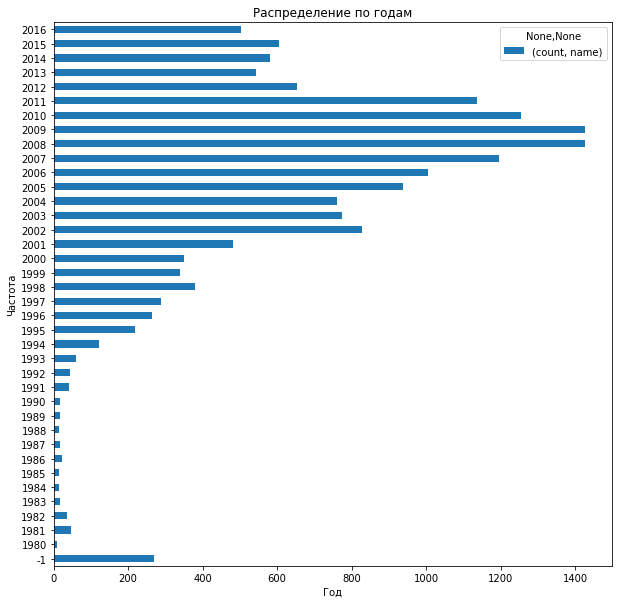

In [33]:
df.pivot_table(index='year_of_release', values='name', 
               aggfunc=['count']).plot(kind='barh', 
                                       title='Распределение по годам', figsize=(10,10));
plt.xlabel("Год");
plt.ylabel("Частота");

*Мы имеем данные от 1980-2016г. По графику выше видно, что начиная от 1994года релиз игр начал набирать обороты и достиг своего пика 2008-2009годах, после 2011г. начался резкий спад релизов. По-моему все данные, что до 90-х не особо важны.*

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

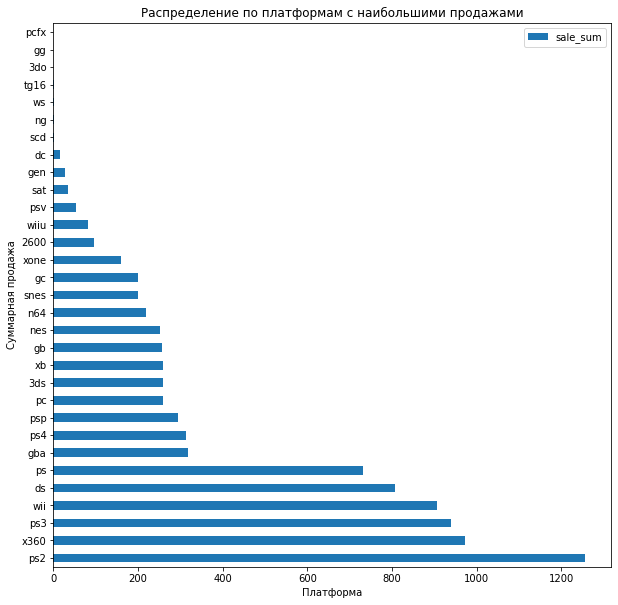

In [34]:
max_saled_platforms=df.groupby('platform').agg({'sale_sum':'sum'})
max_saled_platforms=max_saled_platforms.sort_values('sale_sum', ascending=False)
max_saled_platforms.plot(kind='barh', title='Распределение по платформам с наибольшими продажами', figsize=(10,10));
plt.xlabel("Платформа");
plt.ylabel("Cуммарная продажа");

In [35]:
max_saled_platforms.sort_values('sale_sum', ascending=False).head()

,sale_sum
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12


*Самая продаваемая платформа - ps2-1255.77, далее идет - ps3 - 939.65, x360 - 971.42. и wii	- 907.51млн. копии*

**Теперь рассмотрим продаваемость платформ по годам**

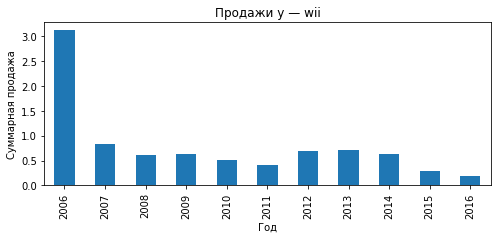

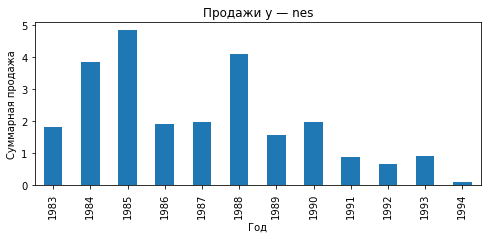

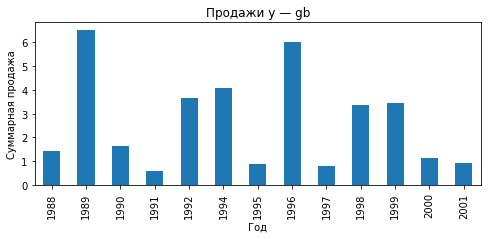

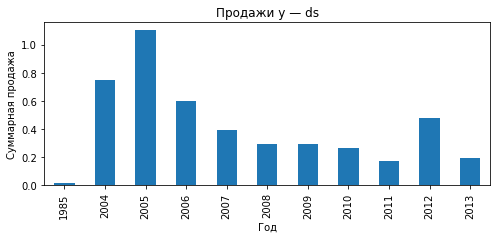

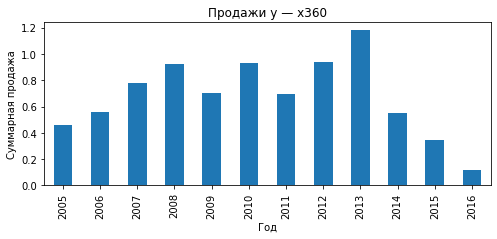

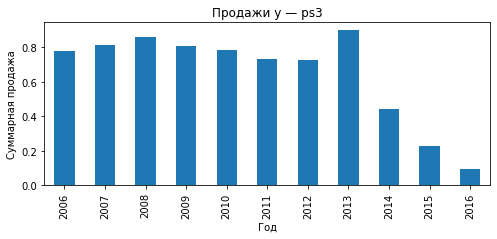

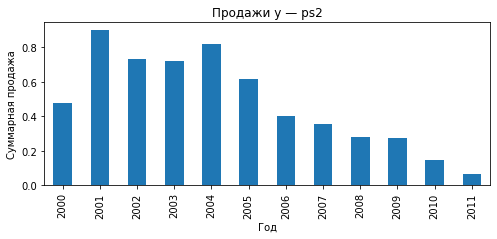

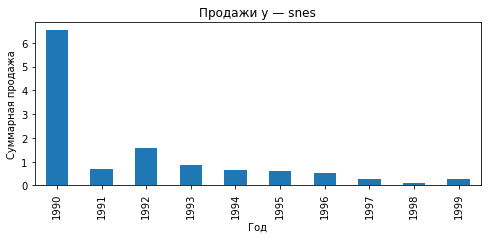

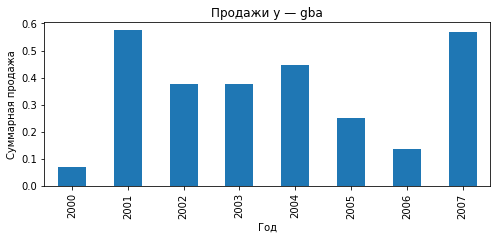

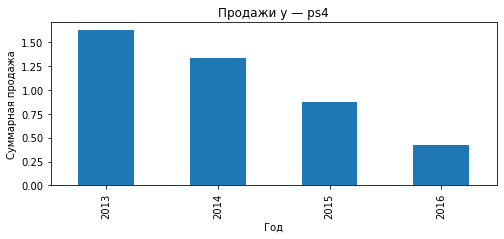

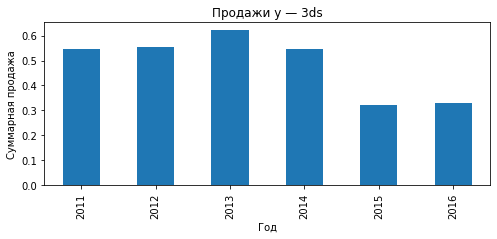

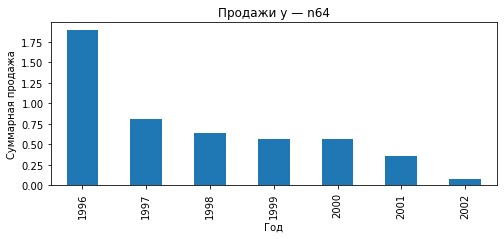

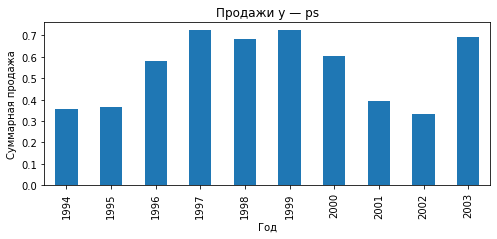

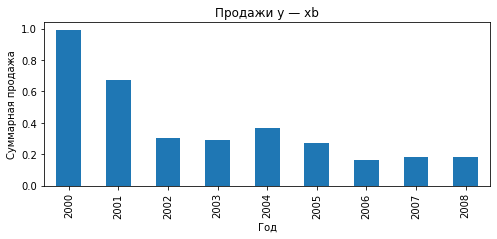

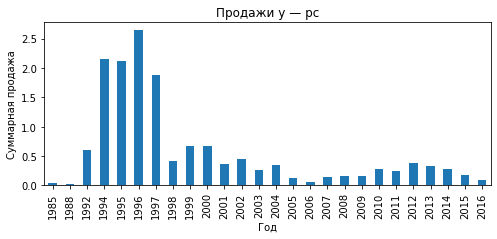

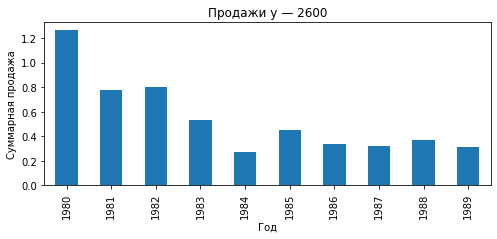

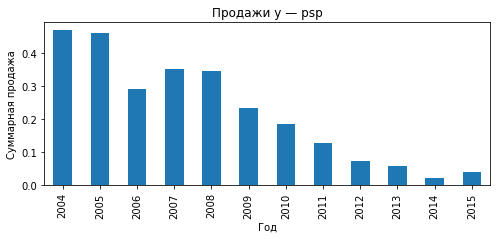

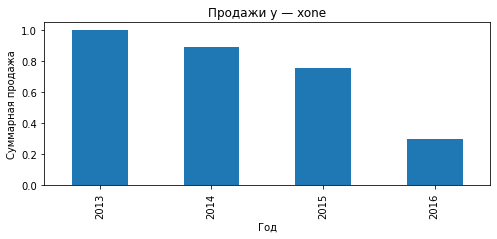

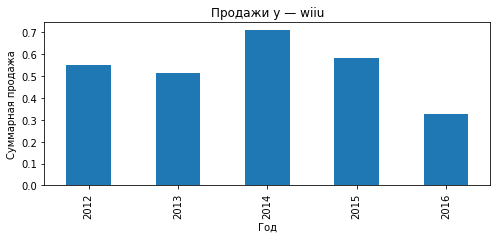

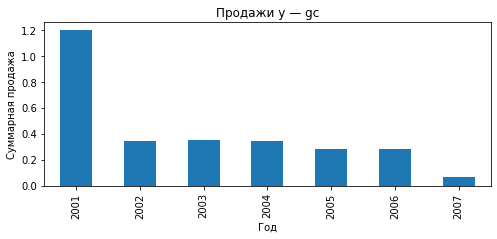

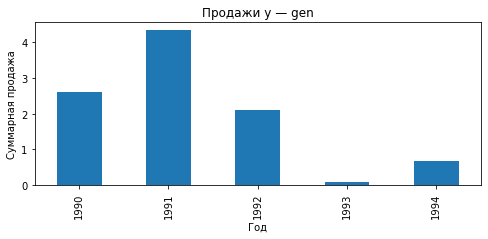

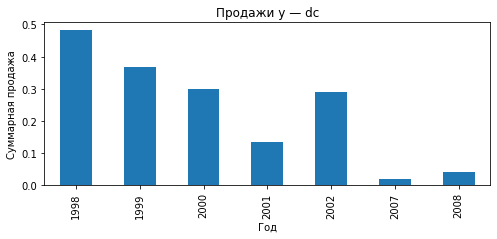

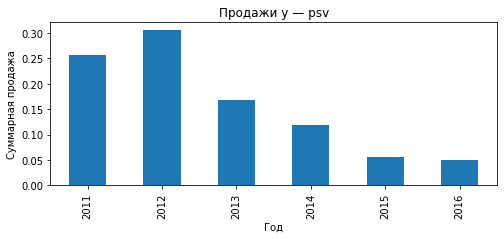

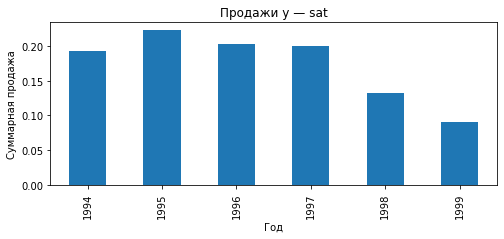

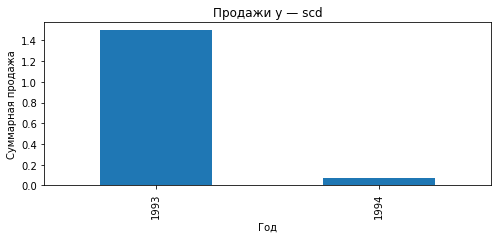

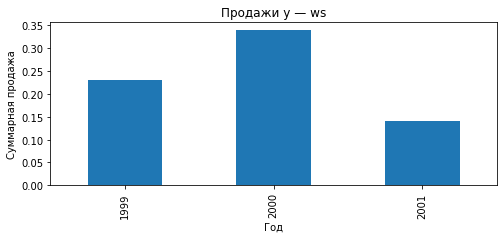

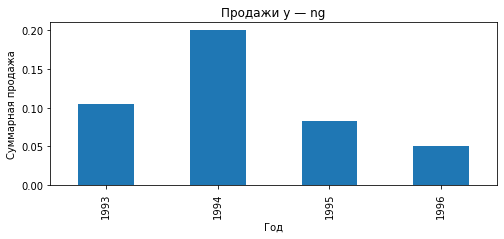

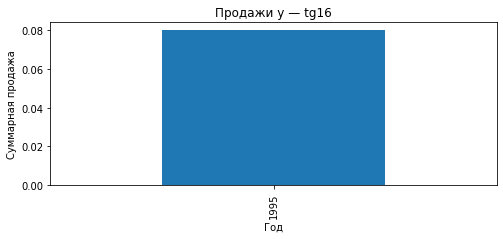

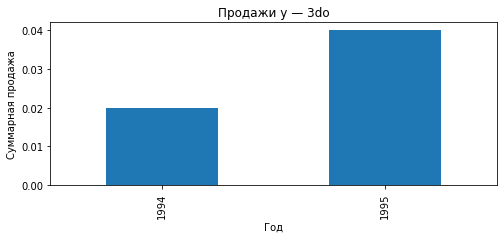

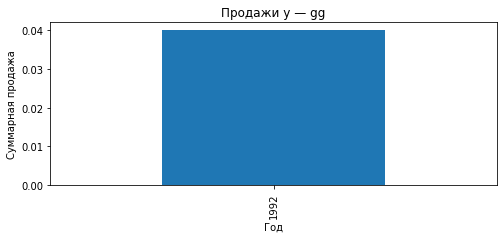

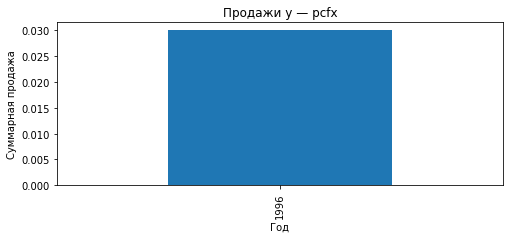

In [36]:
df=df[df['year_of_release'] != -1]
 
for i in df.platform.unique():
    df[df.platform == i].pivot_table(index='year_of_release', values='sale_sum').plot(legend=False, figsize=(8,3), kind='bar')
    plt.title(f"Продажи у — {i}")
    plt.xlabel("Год");
    plt.ylabel("Cуммарная продажа");

In [37]:
max_saled_platforms.sort_values('sale_sum', ascending=False).head()

,sale_sum
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12


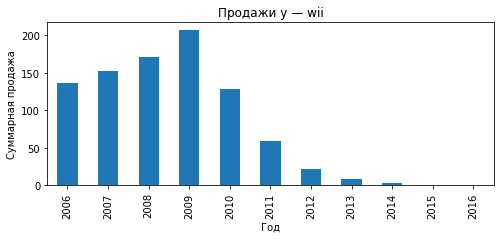

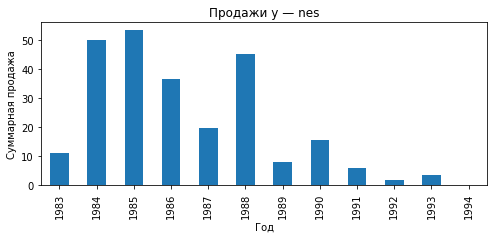

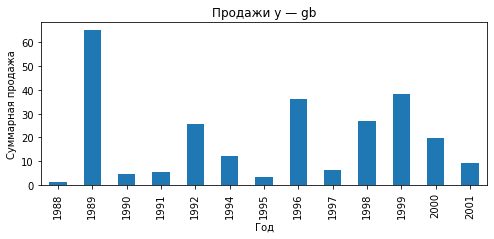

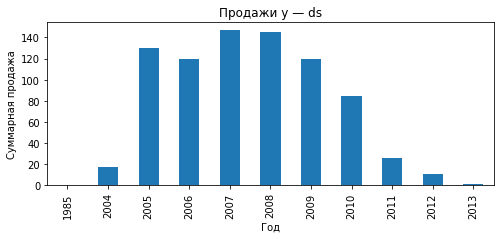

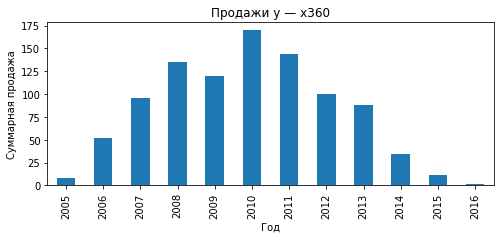

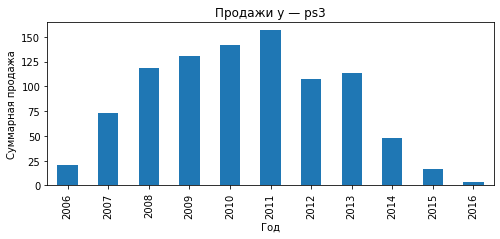

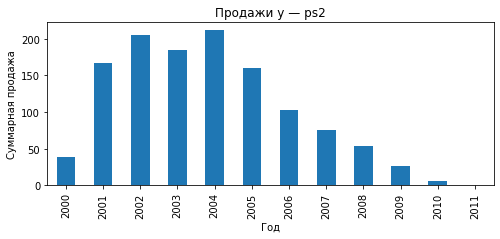

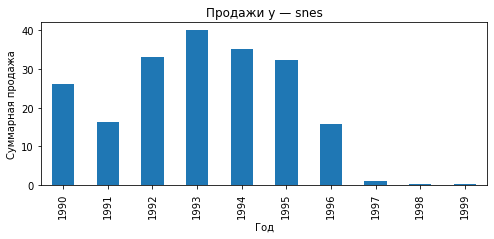

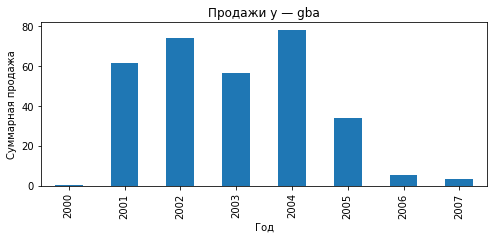

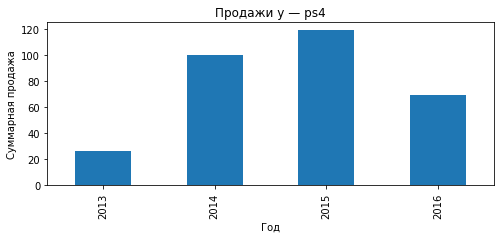

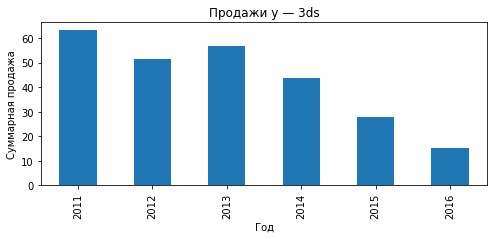

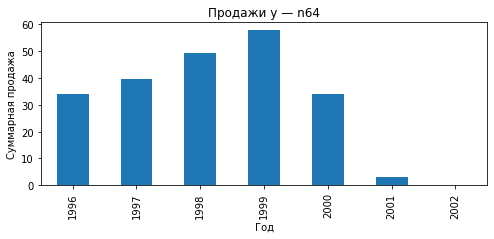

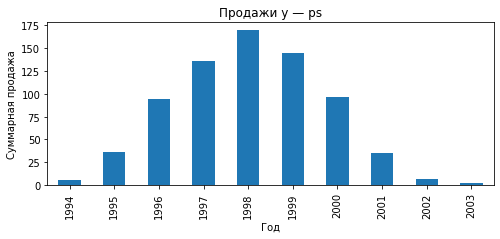

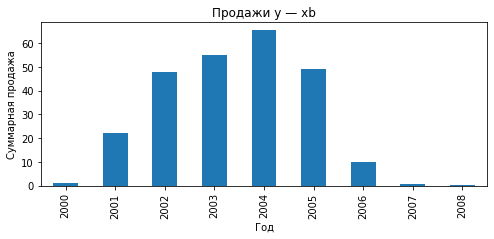

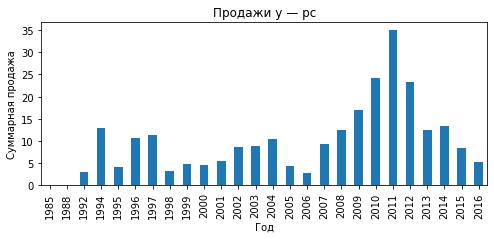

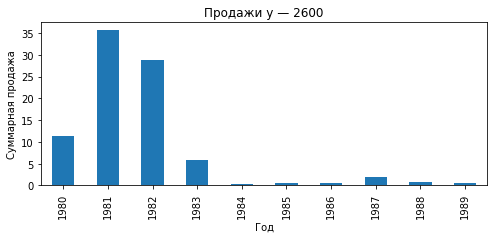

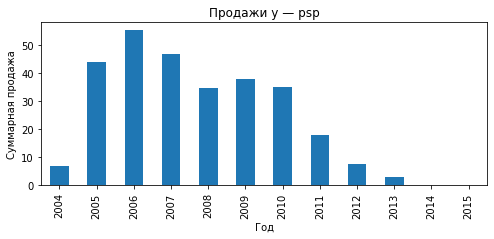

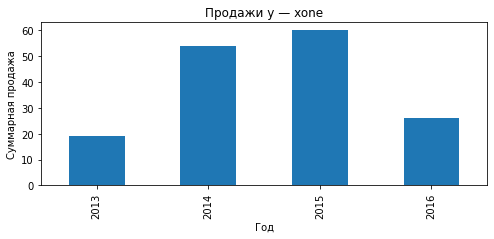

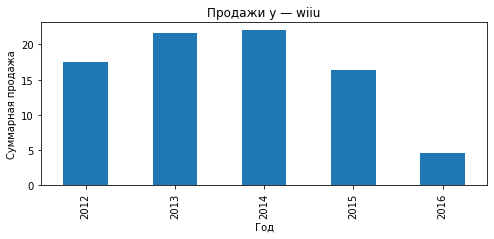

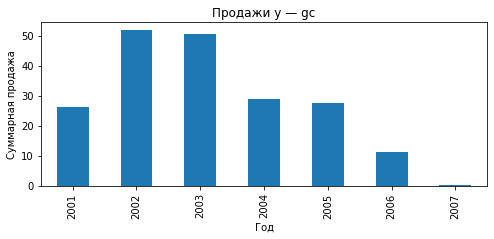

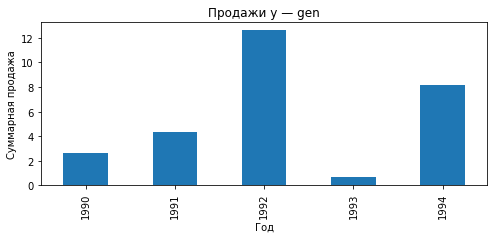

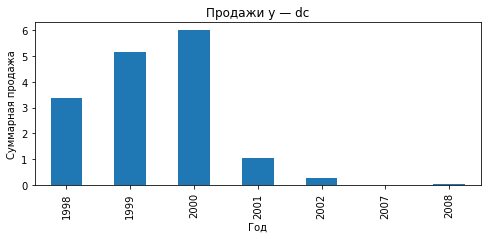

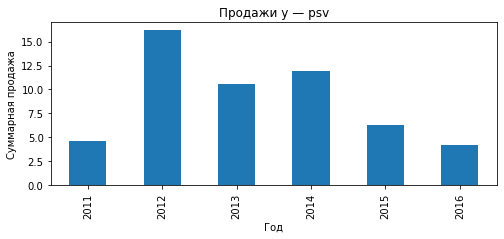

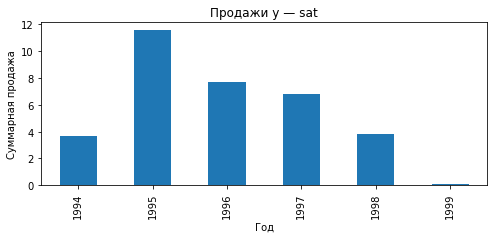

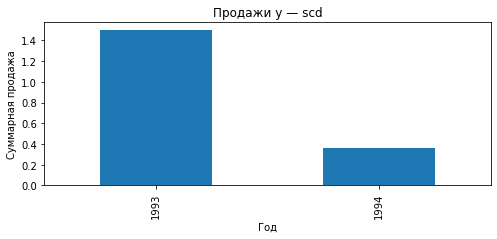

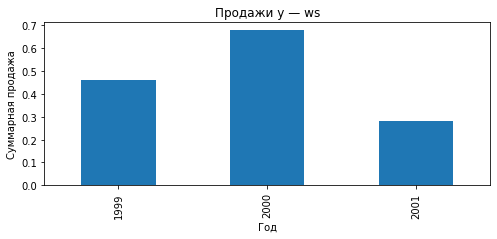

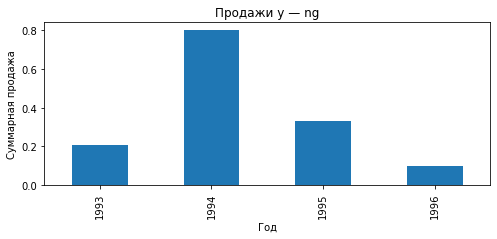

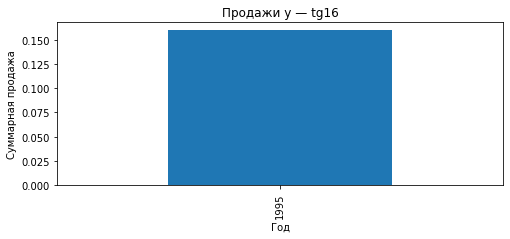

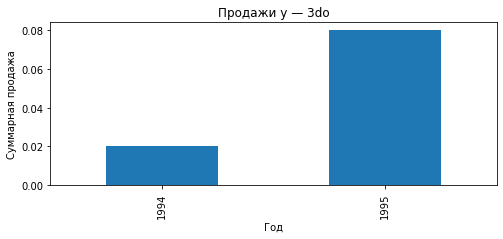

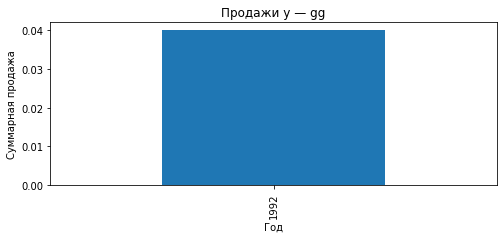

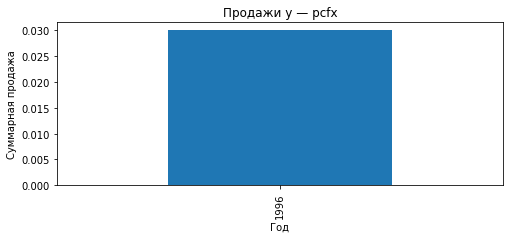

In [38]:
df=df[df['year_of_release'] != -1]
 
for i in df.platform.unique():
    df[df.platform == i].pivot_table(index='year_of_release', values='sale_sum', aggfunc='sum').plot(legend=False, figsize=(8,3), kind='bar')
    plt.title(f"Продажи у — {i}")
    plt.xlabel("Год");
    plt.ylabel("Cуммарная продажа");

Из платформ вышедших в прошлом веке, самым долгожителем оказался рс (30лет). Платформы wii, scd, gc, snes в начале выпуска образовали большой интерес, но буквально через год их продажи начали стремительно падать. 

Рассмотрим графики  трех самых продаваемых платформ по отдельности: 
В 2001г. продажы ps2 начали резко расти, и достигли своего пика 2002 и 2004 годах. После 2004г. замечен значительно ровный спад продаж. 

Продажи x360 имеют небольшие колебания. Начался рост продаж в 2006г. в 2009г. немного упал и к 2011г. достиг своего пика. Затем виден постепенный спад продаж до 2016г.

В 2006г. продажы ps3 начали плавно расти, и достигнув пика в 2011г. начали падать, и после 2013г. виден сильный спад продаж.

Возьмем грубо: все платформы, продажи которых остановились или приблизились к нижней отметке отнесем к непопулярным и их уже рассматривать не будем(массив см.ниже).

In [39]:
no_popular=df.query('year_of_release<2013' and 'sale_sum<2')
no_popular.groupby('platform').agg({'sale_sum':'sum'})
no_popular=no_popular.sort_values('sale_sum', ascending=False)
no_popular['platform'].unique()

array(['gb', 'gba', 'snes', 'ps3', 'ds', 'ps', 'ps4', '2600', 'x360',
       'ps2', 'xb', 'psv', 'nes', 'psp', 'pc', 'sat', 'wii', '3ds', 'n64',
       'gc', 'gen', 'dc', 'wiiu', 'xone', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

**Вывод: по данным выше можно заметить, что продажи игр на разных платформах каждый год варьируются. В среднем каждая платформа продается от 3-4 лет: в начале продаж мало, на следующий год идет резкий скачок и продажи растут, достигая пика, затем продажи плавно падают**

In [40]:
# check

df_box = pd.DataFrame([['ps','GTA', 1,2,3, 2012],
                   ['ps','GTA',3,5,6, 2013],
                   ['ps','GTA',8,9,10, 2014],
                   ['ps4','GTA',1,7,3, 2010],
                   ['ps4','GTA',5,2,3, 2011],
                   ['ps4','GTA',15,22,333, 2009]], columns=['platform', 'name', 'eu','jp','na', 'col_1'])
df_box

,platform,name,eu,jp,na,col_1
0,ps,GTA,1,2,3,2012
1,ps,GTA,3,5,6,2013
2,ps,GTA,8,9,10,2014
3,ps4,GTA,1,7,3,2010
4,ps4,GTA,5,2,3,2011
5,ps4,GTA,15,22,333,2009


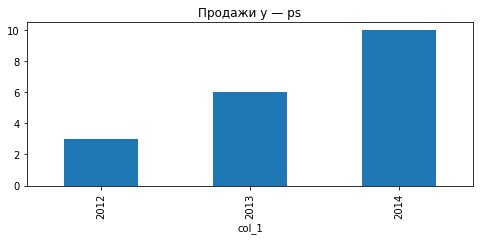

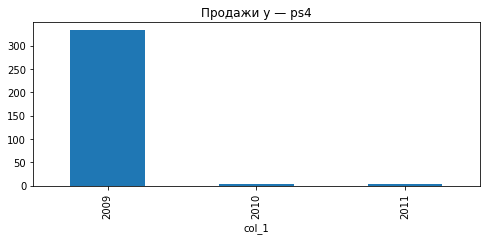

In [41]:
for i in df_box.platform.unique():
    df_box[df_box.platform == i].pivot_table(index='col_1', values='na').plot(legend=False, figsize=(8,3), kind='bar')
    plt.title(f"Продажи у — {i}")

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

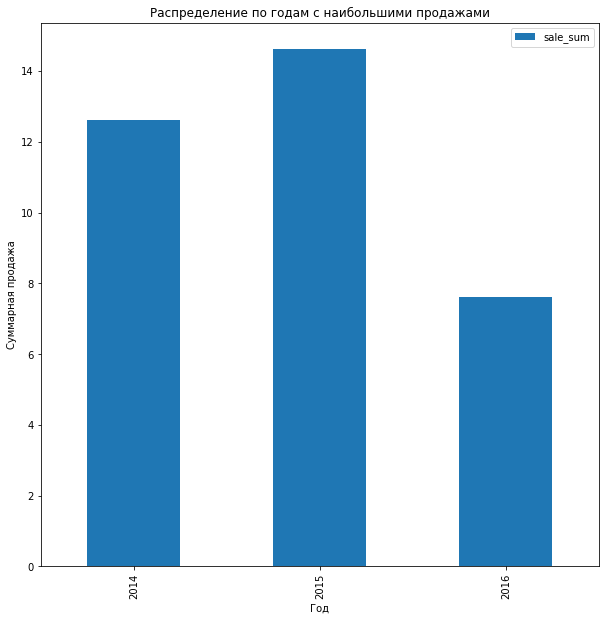

In [42]:
actual_period= df[df['year_of_release'] != -1]
actual_period=actual_period.query('year_of_release >=2014')
actual_period.groupby('year_of_release').agg({'sale_sum':'max'}).plot(kind='bar', title='Распределение по годам с наибольшими продажами', figsize=(10,10));
plt.xlabel("Год");
plt.ylabel("Cуммарная продажа");

**По анализу выше был сделан вывод, что для прогноза на 2017г. нужно взять последние 3года. Так как игровая индустрия считается, динамично меняющейся индустрей. Теперь определим какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [43]:
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale_sum
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1.0,-1,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,-1,-1.0,-1,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1,-1.0,-1,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-1.0,-1,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,-1,-1.0,-1,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1,-1.0,-1,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-1.0,-1,0.01


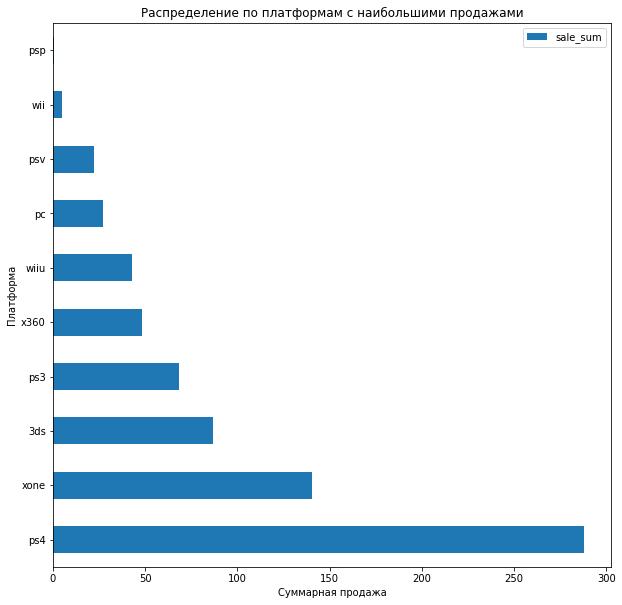

In [44]:
actual_period_max_sales=actual_period.groupby('platform').agg({'sale_sum':'sum'})
actual_period_max_sales=actual_period_max_sales.sort_values('sale_sum', ascending=False)
actual_period_max_sales.plot(kind='barh', title='Распределение по платформам с наибольшими продажами', figsize=(10,10));
plt.xlabel("Cуммарная продажа");
plt.ylabel("Платформа");


Лидеры продаж: ps4, xone и возможно 3ds. А вот некоторые платформы как psp, wii совсем изчезают из поля зрения продаж. 

**Проанализируем несколько лидеров продаж.**

Теперь посмотрим каждую платформу по отдельности и далее посмотрим другие платформы, которые сейчас более-менее на слуху

In [45]:
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale_sum
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1.0,-1,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,-1,-1.0,-1,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1,-1.0,-1,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-1.0,-1,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,-1,-1.0,-1,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1,-1.0,-1,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-1.0,-1,0.01


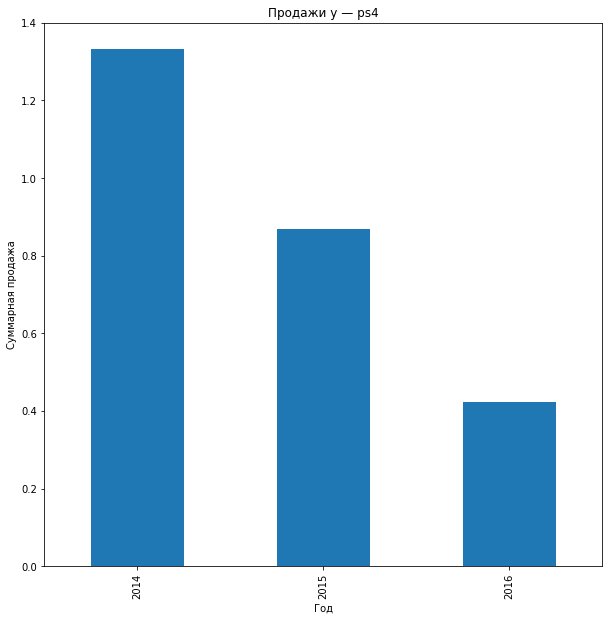

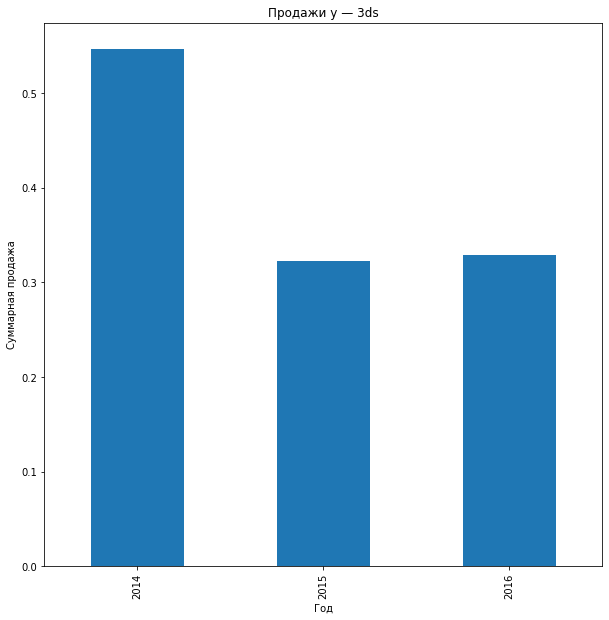

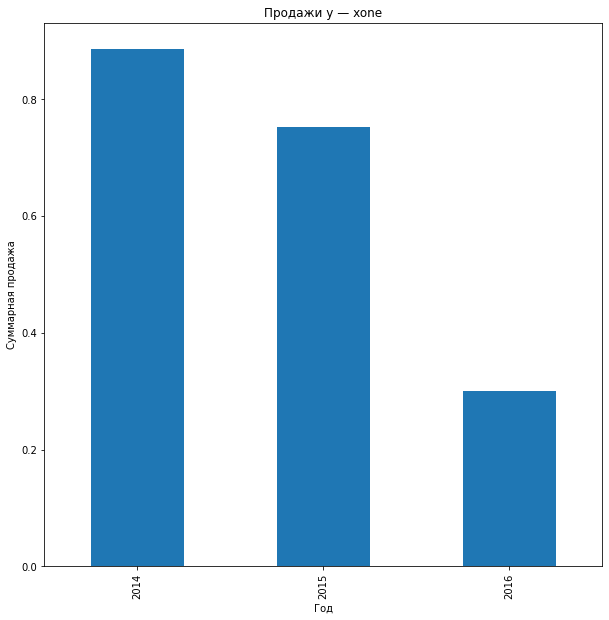

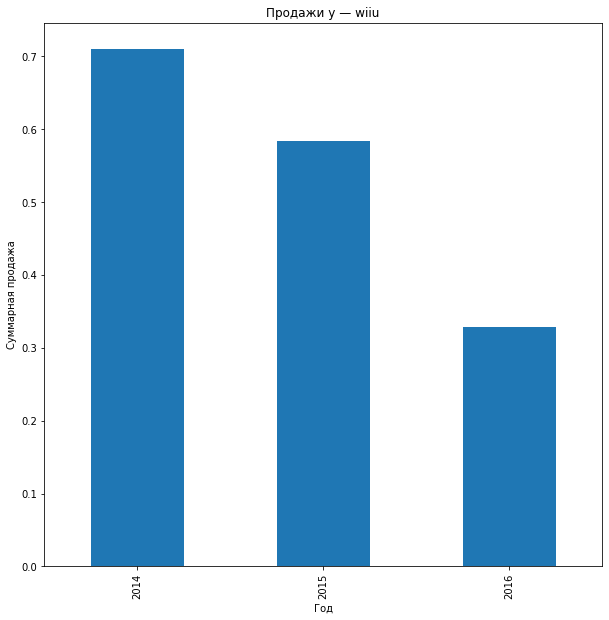

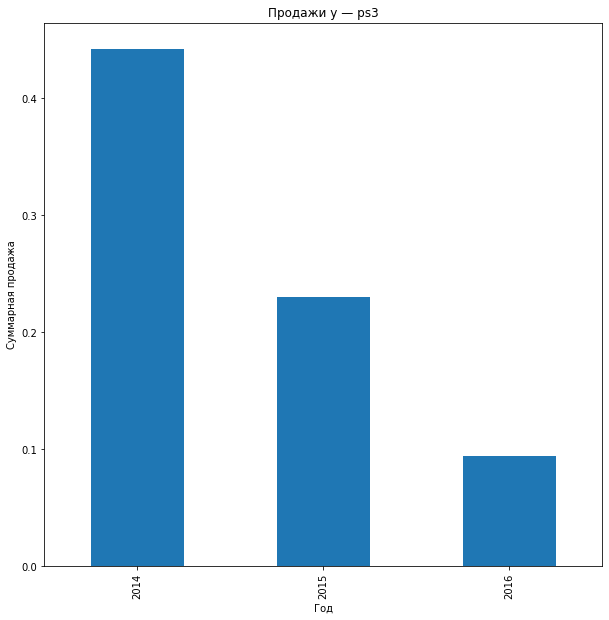

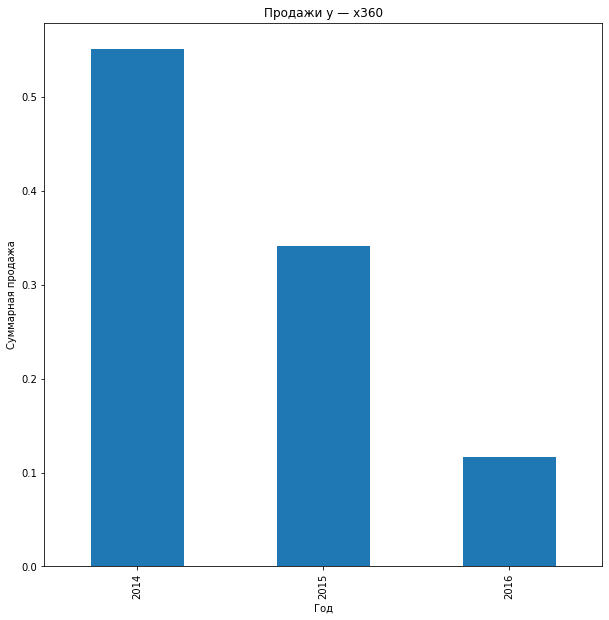

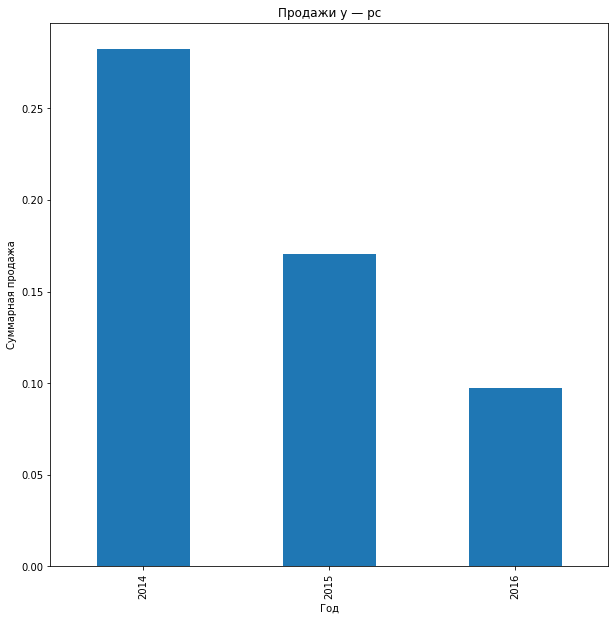

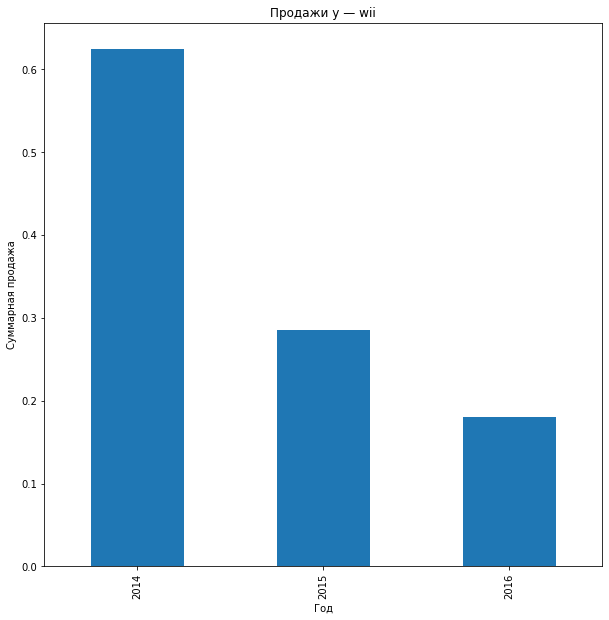

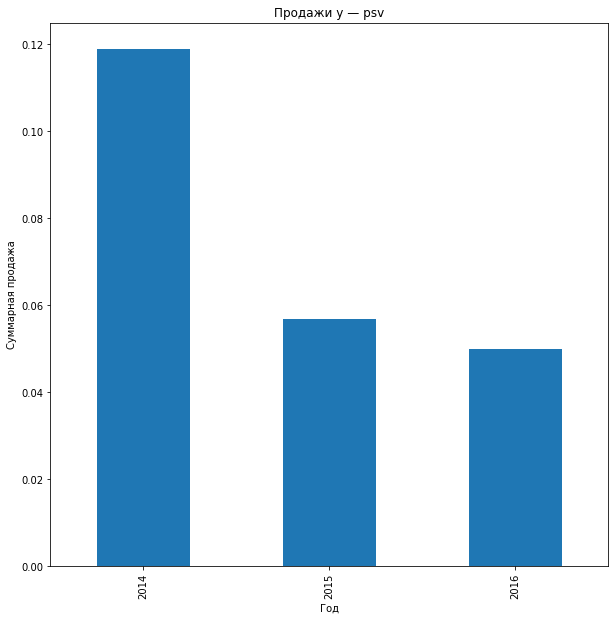

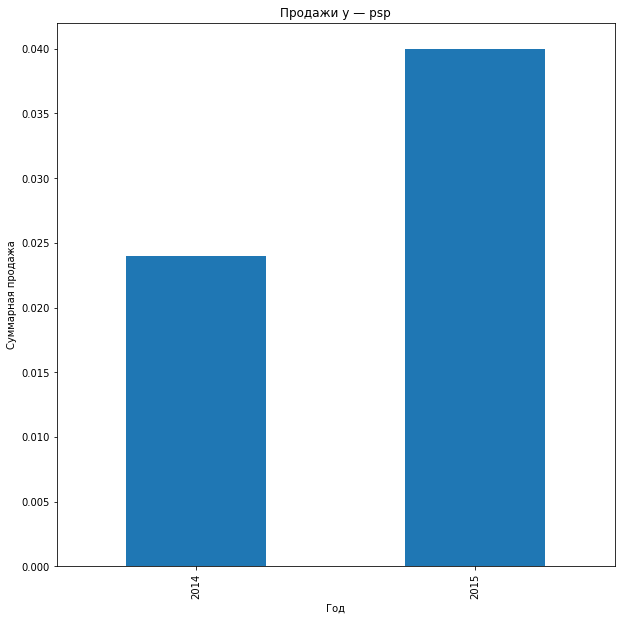

In [46]:
for i in actual_period.platform.unique():
    actual_period[actual_period.platform == i].pivot_table(index='year_of_release', values='sale_sum').plot(legend=False, figsize=(10,10), kind='bar')
    plt.title(f"Продажи у — {i}")
    plt.xlabel("Год");
    plt.ylabel("Cуммарная продажа");

У ps4 продажи начались в 2013г. Идет линейный спад продаж - не рентабельно. 
У psp в 2016г. продаж вообще не было, однако по сравнению с 2014 годом продажи выросли на одну треть, можно только прогнозировать успех в 2017г.
Продажи ps3  год сильно падают. Это уже не прибыльная платформа
Продажи wii  год сильно падают. Это не прибыльная платформа
Рс - не прибыльная
xone вряд лс еще будет на плаву к 2017г. 
Платформы 3ds и psv второй год подряд стабильно пользуется спросом
wiiu не внушает надежды на рост продаж. Продажи упали в 4 раз
Продажи psv внушают надежды на рост продаж. А вдруг!

**Вывод: из всех платформ потенциально прибыльной является - xone, psv и 3ds. Вывод был сделан так: где продажи упали не более 2-х раз по сравнению с прошлым годом**

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат

In [47]:
actual_period.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sale_sum
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000
mean,2014.953227,0.168182,0.160261,0.055115,0.048324,30.162818,3.008111,0.431883
std,0.799624,0.446134,0.466846,0.211513,0.141790,37.114050,3.978406,1.056109
min,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,-1.000000,3.400000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,71.000000,7.100000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


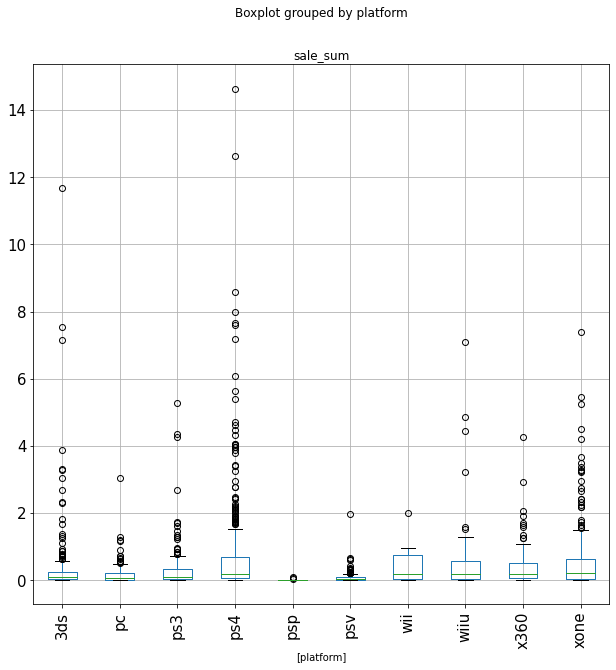

In [48]:
boxplot = actual_period.boxplot(column=['sale_sum'], by=['platform'], rot=90, fontsize=15, figsize=(10, 10));
boxplot;

В платформе ps4 видим большие выбросы

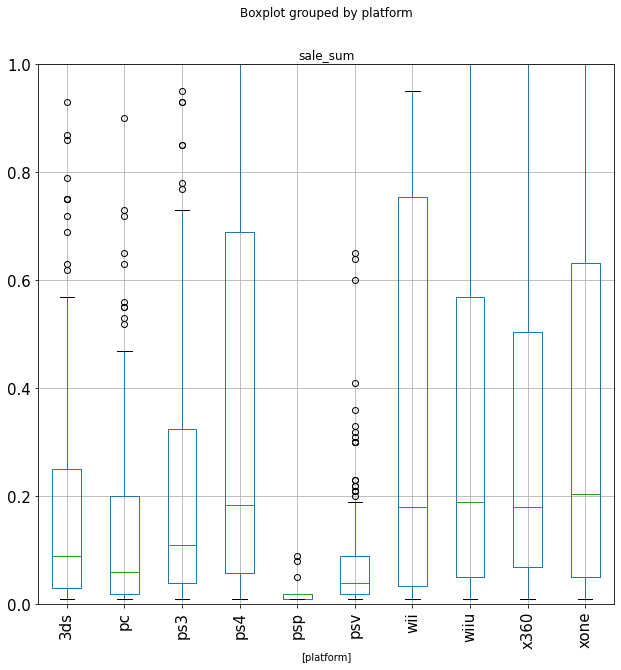

In [49]:
boxplot = actual_period.boxplot(column=['sale_sum'], by=['platform'], rot=90, fontsize=15, figsize=(10, 10));
boxplot;
plt.ylim([0, 1]);

Самая частовстречаемая платформа-wii затем - ps4, потом- xone. Хотя медиана у xone больше чем, у первых двоих, ну размах тоже у  ps4 и xone больше чем у wii. 

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

В качестве популярной платформы возьмем ps4 и посмотрим оценку критиков

In [50]:
critic_score = df[(df['critic_score'] != -1) & (df['platform']=='ps4')]
critic_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale_sum
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,super dungeon bros,ps4,2016,action,0.01,0.00,0.00,0.00,42,2.3,E10+,0.01
16499,sherlock holmes: the devil's daughter,ps4,2016,adventure,0.01,0.00,0.00,0.00,70,6.8,T,0.01
16500,root letter,ps4,2016,adventure,0.00,0.00,0.01,0.00,69,7.5,-1,0.01
16526,dungeons 2,ps4,2016,role-playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01


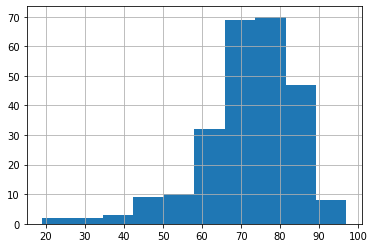

In [51]:
critic_score['critic_score'].hist();

Хорошие отзывы, средний отзыв - 72(самая частая оценка критиков-медианная), мин-19, макс-97.

Оценика пользователей

In [52]:
user_score = df[(df['user_score'] != -1) & (df['platform']=='ps4')]
user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale_sum
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,super dungeon bros,ps4,2016,action,0.01,0.00,0.00,0.00,42,2.3,E10+,0.01
16499,sherlock holmes: the devil's daughter,ps4,2016,adventure,0.01,0.00,0.00,0.00,70,6.8,T,0.01
16500,root letter,ps4,2016,adventure,0.00,0.00,0.01,0.00,69,7.5,-1,0.01
16526,dungeons 2,ps4,2016,role-playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01


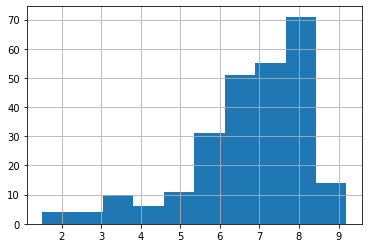

In [53]:
user_score['user_score'].hist();

Оценка пользователей чуть ниже чем у критиков. Медианная-6.7, минимальная - 1.5, макс-9.2

In [54]:
sale_sum=df.query('platform=="ps4"')['sale_sum']
corr_df = pd.DataFrame()
corr_df['critic_score'] = critic_score['critic_score']
corr_df['user_score'] = user_score['user_score']
corr_df['sale_sum']=sale_sum
corr_df

,critic_score,user_score,sale_sum
42,97,8.3,12.62
77,82,4.3,8.58
92,83,5.7,7.66
94,85,5.0,7.60
105,87,6.5,7.17
...,...,...,...
16486,42,2.3,0.01
16499,70,6.8,0.01
16500,69,7.5,0.01
16526,61,7.9,0.01


In [55]:
critic_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale_sum
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,super dungeon bros,ps4,2016,action,0.01,0.00,0.00,0.00,42,2.3,E10+,0.01
16499,sherlock holmes: the devil's daughter,ps4,2016,adventure,0.01,0.00,0.00,0.00,70,6.8,T,0.01
16500,root letter,ps4,2016,adventure,0.00,0.00,0.01,0.00,69,7.5,-1,0.01
16526,dungeons 2,ps4,2016,role-playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01


In [56]:
user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale_sum
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,super dungeon bros,ps4,2016,action,0.01,0.00,0.00,0.00,42,2.3,E10+,0.01
16499,sherlock holmes: the devil's daughter,ps4,2016,adventure,0.01,0.00,0.00,0.00,70,6.8,T,0.01
16500,root letter,ps4,2016,adventure,0.00,0.00,0.01,0.00,69,7.5,-1,0.01
16526,dungeons 2,ps4,2016,role-playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01


In [57]:
corr = corr_df[['critic_score', 'user_score', 'sale_sum']].corr()
corr.style.format("{:.2%}")

,critic_score,user_score,sale_sum
critic_score,100.00%,55.77%,40.66%
user_score,55.77%,100.00%,-3.36%
sale_sum,40.66%,-3.36%,100.00%


In [58]:
corr.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,sale_sum
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.033625
sale_sum,0.406568,-0.033625,1.000000


Корреляция между оценками критиков и продажами не больше чем связь с оценкой с пользовательскими оценками, тем не менее связь оценки критиков с продажами есть. 
Соотношение оценки критиков и продаж составляет около 0.40. Коэффициент положительный, это означает, что более высокие оценки критиков, и продажи имеют некоторую прогностическую ценность. Если вы знаете чей-то рейтинг от критика, вы можете лучше предположить его продаваемость, и наоборот.

Корреляция между пользовательской оценкой и продажами составляет примерно -0.03.  Совершенно отрицательная линейная корреляция, это означает, что если знание рейтинга от игроков увеличивается, то продажи имеют тенденцию к уменьшению, но слабым или ненадежным образом.

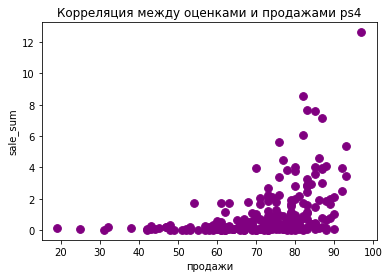

In [59]:
corr_df.plot(x='critic_score', y='sale_sum', kind='scatter', s= 60 , c='purple', title='Корреляция между оценками и продажами ps4');
plt.xlabel('оценка');
plt.xlabel('продажи');

**Сравним корреляцию платформы ps4 c X360**

In [60]:
critic_score_x360 = df[(df['critic_score'] != -1) & (df['platform']=='x360')]
critic_score_x360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale_sum
14,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
32,call of duty: black ops,x360,2010,shooter,9.70,3.68,0.11,1.13,87,6.3,M,14.62
35,call of duty: black ops ii,x360,2012,shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
15743,worms,x360,2007,strategy,0.00,0.02,0.00,0.00,75,6.9,E10+,0.02
16311,banjo-kazooie,x360,2008,platform,0.00,0.01,0.00,0.00,77,8.2,E,0.01
16474,john daly's prostroke golf,x360,2010,sports,0.01,0.00,0.00,0.00,57,-1.0,E,0.01
16550,superstars v8 racing,x360,2009,racing,0.00,0.01,0.00,0.00,62,-1.0,E,0.01


In [61]:
user_score_x360 = df[(df['user_score'] != -1) & (df['platform']=='x360')]
user_score_x360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale_sum
14,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
32,call of duty: black ops,x360,2010,shooter,9.70,3.68,0.11,1.13,87,6.3,M,14.62
35,call of duty: black ops ii,x360,2012,shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16311,banjo-kazooie,x360,2008,platform,0.00,0.01,0.00,0.00,77,8.2,E,0.01
16450,turbo: super stunt squad,x360,2013,sports,0.00,0.01,0.00,0.00,-1,4.5,E,0.01
16460,young justice: legacy,x360,2013,action,0.00,0.01,0.00,0.00,-1,6.2,T,0.01
16613,dragon ball z for kinect,x360,2012,fighting,0.01,0.00,0.00,0.00,49,2.1,T,0.01


In [62]:
sale_sum=df.query('platform=="x360"')['sale_sum']
corr_df_1 = pd.DataFrame()
corr_df_1['critic_score'] = critic_score_x360['critic_score']
corr_df_1['user_score'] = user_score_x360['user_score']
corr_df_1['sale_sum']=sale_sum
corr_df_1

,critic_score,user_score,sale_sum
14,61,6.3,21.82
23,97,8.1,16.27
29,88,3.4,14.73
32,87,6.3,14.62
35,83,4.8,13.68
...,...,...,...
15743,75,6.9,0.02
16311,77,8.2,0.01
16474,57,NaN,0.01
16550,62,NaN,0.01


In [63]:
corr_1 = corr_df_1[['critic_score', 'user_score', 'sale_sum']].corr()
corr_1.style.format("{:.2%}")

,critic_score,user_score,sale_sum
critic_score,100.00%,62.50%,39.29%
user_score,62.50%,100.00%,11.03%
sale_sum,39.29%,11.03%,100.00%


In [64]:
corr_1.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,sale_sum
critic_score,1.000000,0.625020,0.392866
user_score,0.625020,1.000000,0.110280
sale_sum,0.392866,0.110280,1.000000


Корреляция между пользовательской оценкой и продажами составляет примерно 0,11. Коэффициент означает, что знание рейтинга от игроков не поможет, если вы попытаетесь угадать их продажу.


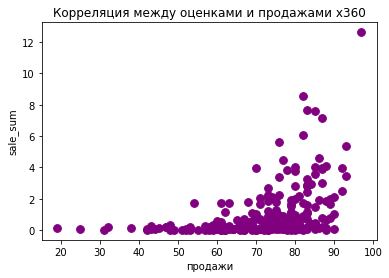

In [65]:
corr_df.plot(x='critic_score', y='sale_sum', kind='scatter', s= 60 , c='purple', title='Корреляция между оценками и продажами x360');
plt.xlabel('оценка');
plt.xlabel('продажи');

*Корреляция для 3ds**

In [66]:
critic_score_3ds = df[(df['critic_score'] != -1) & (df['platform']=='3ds')]
critic_score_3ds

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale_sum
40,mario kart 7,3ds,2011,racing,5.03,4.02,2.69,0.91,85,8.2,E,12.65
53,super mario 3d land,3ds,2011,platform,4.89,3.00,2.14,0.78,90,8.4,E,10.81
62,new super mario bros. 2,3ds,2012,platform,3.66,3.14,2.47,0.63,78,7.2,E,9.90
73,animal crossing: new leaf,3ds,2012,simulation,2.03,2.36,4.39,0.39,88,8.7,E,9.17
235,luigi's mansion: dark moon,3ds,2013,action,1.80,1.39,1.11,0.29,86,8.4,E,4.59
...,...,...,...,...,...,...,...,...,...,...,...,...
14472,zero escape: virtue's last reward,3ds,2012,adventure,0.03,0.00,0.00,0.00,88,8.8,M,0.03
14534,power rangers super megaforce,3ds,2014,action,0.01,0.01,0.00,0.00,43,-1.0,E10+,0.02
15211,phoenix wright: ace attorney trilogy,3ds,2014,adventure,0.00,0.00,0.02,0.00,81,9.0,T,0.02
15521,tenkai knights: brave battle,3ds,2014,action,0.01,0.01,0.00,0.00,26,2.4,E10+,0.02


In [67]:
user_score_3ds = df[(df['user_score'] != -1) & (df['platform']=='3ds')]
user_score_3ds

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale_sum
40,mario kart 7,3ds,2011,racing,5.03,4.02,2.69,0.91,85,8.2,E,12.65
53,super mario 3d land,3ds,2011,platform,4.89,3.00,2.14,0.78,90,8.4,E,10.81
62,new super mario bros. 2,3ds,2012,platform,3.66,3.14,2.47,0.63,78,7.2,E,9.90
73,animal crossing: new leaf,3ds,2012,simulation,2.03,2.36,4.39,0.39,88,8.7,E,9.17
235,luigi's mansion: dark moon,3ds,2013,action,1.80,1.39,1.11,0.29,86,8.4,E,4.59
...,...,...,...,...,...,...,...,...,...,...,...,...
15318,heavy fire: the chosen few 3d,3ds,2011,shooter,0.02,0.00,0.00,0.00,-1,6.3,T,0.02
15521,tenkai knights: brave battle,3ds,2014,action,0.01,0.01,0.00,0.00,26,2.4,E10+,0.02
15729,ben 10 omniverse 2,3ds,2013,action,0.00,0.02,0.00,0.00,-1,7.6,E10+,0.02
16045,turbo: super stunt squad,3ds,2013,sports,0.00,0.01,0.00,0.00,-1,5.2,E,0.01


In [68]:
sale_sum=user_score_3ds['sale_sum']
corr_df_1 = pd.DataFrame()
corr_df_1['critic_score'] = critic_score_3ds['critic_score']
corr_df_1['user_score'] = user_score_3ds['user_score']
corr_df_1['sale_sum']=sale_sum
corr_df_1

,critic_score,user_score,sale_sum
40,85,8.2,12.65
53,90,8.4,10.81
62,78,7.2,9.90
73,88,8.7,9.17
235,86,8.4,4.59
...,...,...,...
14472,88,8.8,0.03
14534,43,NaN,NaN
15211,81,9.0,0.02
15521,26,2.4,0.02


In [69]:
corr_1 = corr_df_1[['critic_score', 'user_score', 'sale_sum']].corr()
corr_1.style.format("{:.2%}")

,critic_score,user_score,sale_sum
critic_score,100.00%,74.52%,33.89%
user_score,74.52%,100.00%,23.21%
sale_sum,33.89%,23.21%,100.00%


In [70]:
corr_1.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,sale_sum
critic_score,1.000000,0.745222,0.338904
user_score,0.745222,1.000000,0.232089
sale_sum,0.338904,0.232089,1.000000


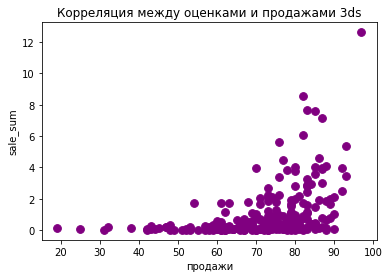

In [71]:
corr_df.plot(x='critic_score', y='sale_sum', kind='scatter', s= 60 , c='purple', title='Корреляция между оценками и продажами 3ds');
plt.xlabel('оценка');
plt.xlabel('продажи');

**Вывод:между оценками критиков и продажами связь больше чем, с пользовательскими оценками. Но тем не менее пользовательские оценки не сильно отличаются от критиков**

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

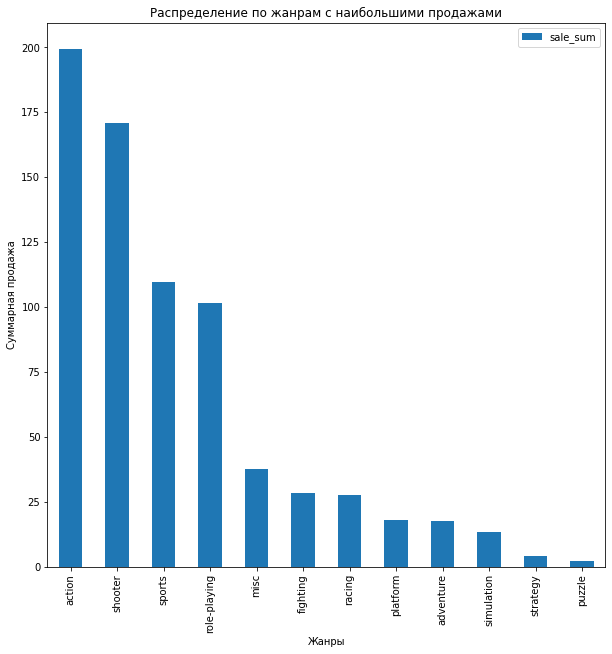

In [72]:
max_saled_genres=actual_period.groupby('genre').agg({'sale_sum':'sum'})
max_saled_genres=max_saled_genres.sort_values('sale_sum', ascending=False)
max_saled_genres.plot(kind='bar', title='Распределение по жанрам с наибольшими продажами', figsize=(10,10));
plt.xlabel("Жанры");
plt.ylabel("Cуммарная продажа");

In [73]:
max_saled_genres

,sale_sum
genre,
action,199.36
shooter,170.94
sports,109.48
role-playing,101.44
misc,37.55
fighting,28.22
racing,27.52
platform,18.09
adventure,17.55


Самые продаваемые жанры - action - 199.36, sports-170.94, shooter-109.48. Ведь в основном в игры играют мальчики

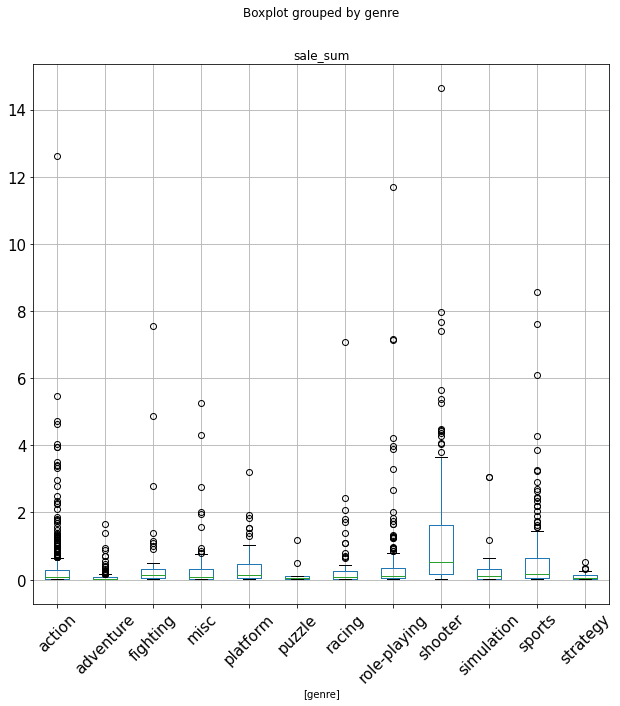

In [74]:
boxplot = actual_period.boxplot(column=['sale_sum'], by=['genre'], rot=45, fontsize=15, figsize=(10, 10));
boxplot;

Не смотря на высокие продажи в экшн, в выборке игр жанра экшн не так много.В жанре стрелялки видим большой размах . Стоит еще заметить, что спорт игр тоже немало.
самый невостребованный жанр - симуляторы, приключение, пазлы и стратегии

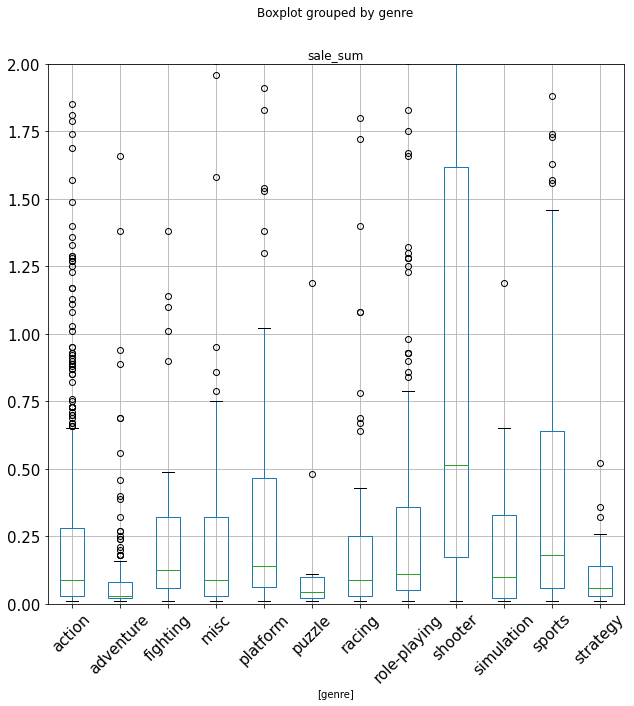

In [75]:
boxplot = actual_period.boxplot(column=['sale_sum'], by=['genre'], rot=45, fontsize=15, figsize=(10, 10));
boxplot;
plt.ylim([0, 2]);
#fig.suptitle('Обзор рынка (портрет покупателя)', fontsize=21)

Жанр стрелялок, оказалось существенно отрывается от остальных, его медиана больше чем Q3 остальных жанров, кроме спорт. На втором месте - спорт. Третьем - платформа.

Вывод:
- Самая прогназируемо-продаваемая платформа ps4, анализ был сделан на основе продаж прошлых лет, за основу было взято последние 3года до 2017г. 
- Выяснили, что оценки критиков больше влияют на продажи, чем оценки пользователей
- А самый популярный жанр - экшн.

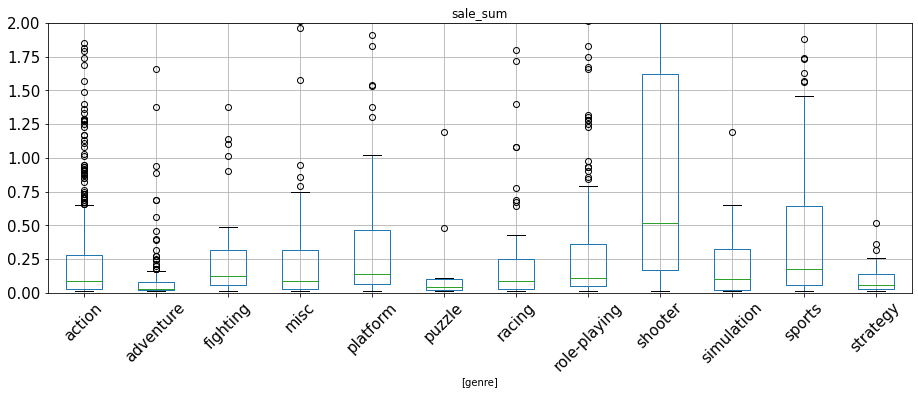

In [76]:
fig, ax = plt.subplots(figsize=(15, 5))
actual_period.boxplot(column=['sale_sum'], by=['genre'], rot=45, fontsize=15,  ax=ax)
fig.suptitle('')
plt.ylim([0, 2]);


### Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.

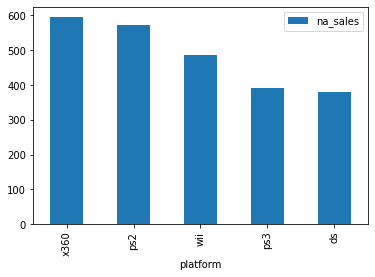

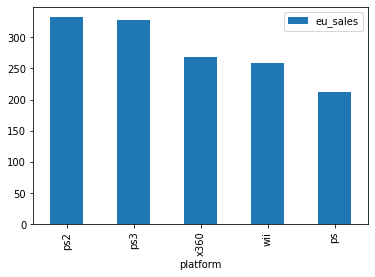

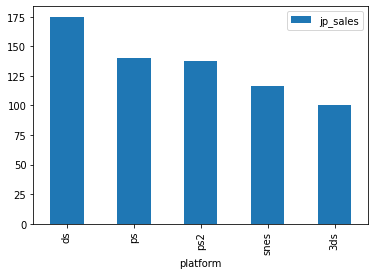

In [77]:
df.groupby('platform').agg({'na_sales':'sum'}).sort_values('na_sales', ascending=False).head().plot(kind='bar');
df.groupby('platform').agg({'eu_sales':'sum'}).sort_values('eu_sales', ascending=False).head().plot(kind='bar');
df.groupby('platform').agg({'jp_sales':'sum'}).sort_values('jp_sales', ascending=False).head().plot(kind='bar');

    В Северной Америке самая популярна платформа - Х360, тогда как в Японии она совсем не входит в топ 5.  Во всех континентах среди топ 5 есть ps2, это их объединяет. Топ 5 Северной Америки и Европы почти не отличается своей номенклатурой. А в Японии есть знаменитые свои платформы как snes, 3ds.

In [78]:
#the full dataframe
actual_period_na=actual_period.groupby('platform').agg({'na_sales':'sum'}).sort_values('na_sales', ascending=False)

#the top 5 na
top_na=actual_period_na.reset_index().head()

#others
other = pd.DataFrame(data = {
    'platform' : ['others'],
    'na_sales' : [actual_period_na['na_sales'][5:].sum()]
})

#combining top 5 with others
na_platform = pd.concat([top_na, other])

In [79]:
na_platform

,platform,na_sales
0,ps4,98.61
1,xone,81.27
2,x360,28.30
3,3ds,22.64
4,ps3,22.05
0,others,31.19


In [80]:
actual_period_eu=actual_period.groupby('platform').agg({'eu_sales':'sum'}).sort_values('eu_sales', ascending=False)
#the top 5 eu
top_eu=actual_period_eu.reset_index().head()

#others
other = pd.DataFrame(data = {
    'platform' : ['others'],
    'eu_sales' : [actual_period_eu['eu_sales'][5:].sum()]
})

#combining top 5 with others
eu_platform = pd.concat([top_eu, other])

In [81]:
eu_platform

,platform,eu_sales
0,ps4,130.04
1,xone,46.25
2,ps3,25.54
3,pc,17.97
4,3ds,16.12
0,others,34.76


In [82]:
actual_period_jp=actual_period.groupby('platform').agg({'jp_sales':'sum'}).sort_values('jp_sales', ascending=False)
#the top 5 jp
top_jp=actual_period_jp.reset_index().head()

#others
other = pd.DataFrame(data = {
    'platform' : ['others'],
    'jp_sales' : [actual_period_jp['jp_sales'][5:].sum()]
})

#combining top 5 with others
jp_platform = pd.concat([top_jp, other])

In [83]:
jp_platform

,platform,jp_sales
0,3ds,44.24
1,ps4,15.02
2,psv,14.54
3,ps3,11.22
4,wiiu,7.31
0,others,0.76


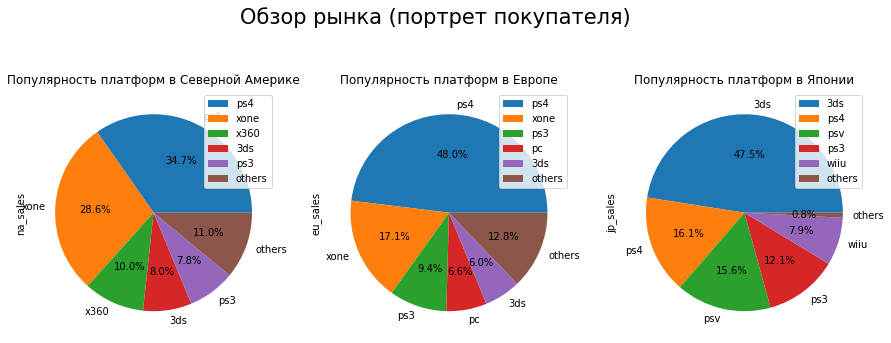

In [85]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
na_platform.plot(kind = 'pie',  autopct='%1.1f%%', labels=na_platform.platform, y = 'na_sales', ax = axes[0])
eu_platform.plot(kind = 'pie',  autopct='%1.1f%%', labels=eu_platform.platform, y = 'eu_sales', ax = axes[1])
jp_platform.plot(kind = 'pie',  autopct='%1.1f%%',labels=jp_platform.platform, y = 'jp_sales', ax = axes[2])
fig.suptitle('Обзор рынка (портрет покупателя)', fontsize=21)
axes[0].set_title('Популярность платформ в Северной Америке')
axes[1].set_title('Популярность платформ в Европе')
axes[2].set_title('Популярность платформ в Японии')
plt.show()

По продажам в Америке и Европе продажи ps4 на первом месте, а в Японии эта платформа на втором месте по популярности. В Японии платформа номер один - 3ds

Самые популярные жанры (топ-5). Поясните разницу.

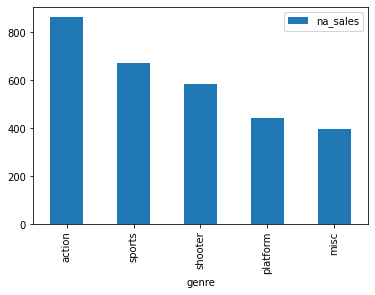

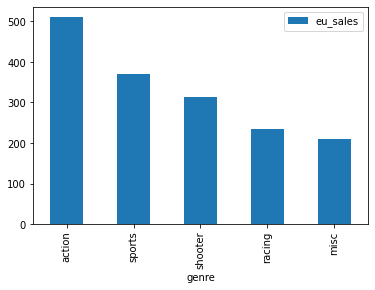

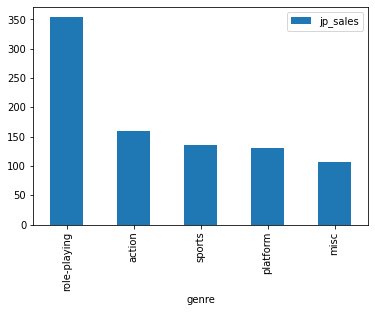

In [87]:
df.groupby('genre').agg({'na_sales':'sum'}).sort_values('na_sales', ascending=False).head().plot(kind='bar');
df.groupby('genre').agg({'eu_sales':'sum'}).sort_values('eu_sales', ascending=False).head().plot(kind='bar');
df.groupby('genre').agg({'jp_sales':'sum'}).sort_values('jp_sales', ascending=False).head().plot(kind='bar');

в Японии больше средств тратят на ролевые игры, когда как в других странах любят экшен. 

In [88]:
#the full dataframe
actual_period_genre_na=actual_period.groupby('genre').agg({'na_sales':'sum'}).sort_values('na_sales', ascending=False)

#the top 5 na
top_genre_na=actual_period_genre_na.head()

#others
other = pd.DataFrame(data = {
    'genre' : ['others'],
    'na_sales' : [actual_period_genre_na['na_sales'][5:].sum()]
})
#combining top 5 with others
na_genre = pd.concat([top_genre_na, other])

In [89]:
#the full dataframe
actual_period_genre_eu=actual_period.groupby('genre').agg({'eu_sales':'sum'}).sort_values('eu_sales', ascending=False)

#the top 5 na
top_genre_eu=actual_period_genre_eu.head()

#others
other = pd.DataFrame(data = {
    'genre' : ['others'],
    'eu_sales' : [actual_period_genre_eu['eu_sales'][5:].sum()]
})
#combining top 5 with others
eu_genre = pd.concat([top_genre_eu, other])

In [90]:
#the full dataframe
actual_period_genre_jp=actual_period.groupby('genre').agg({'jp_sales':'sum'}).sort_values('jp_sales', ascending=False)

#the top 5 na
top_genre_jp=actual_period_genre_jp.head()

#others
other = pd.DataFrame(data = {
    'genre' : ['others'],
    'jp_sales' : [actual_period_genre_jp['jp_sales'][5:].sum()]
})
#combining top 5 with others
jp_genre = pd.concat([top_genre_jp, other])

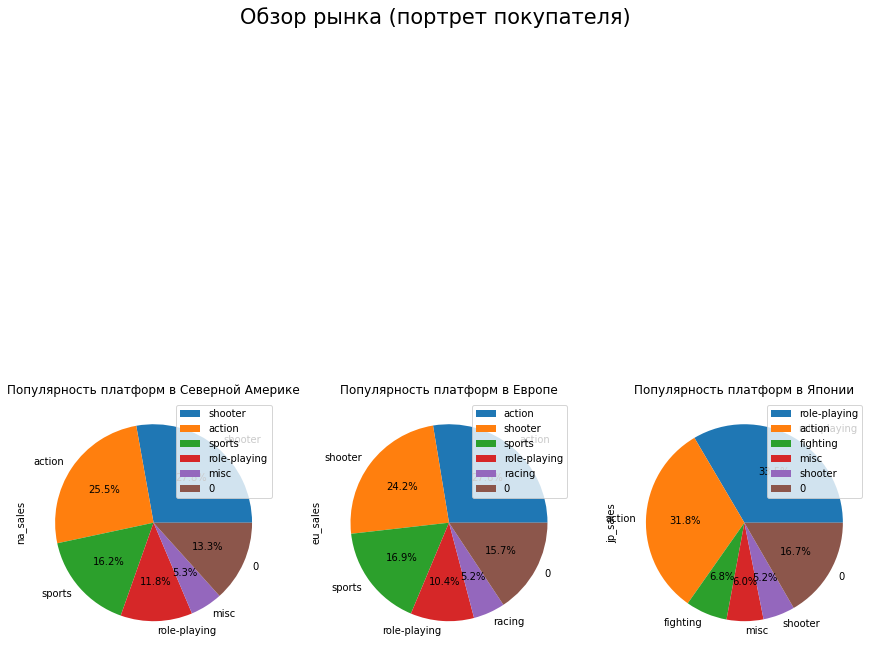

In [91]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,15))
na_genre.plot(kind = 'pie',  autopct='%1.1f%%', y = 'na_sales', ax = axes[0])
eu_genre.plot(kind = 'pie',  autopct='%1.1f%%', y = 'eu_sales', ax = axes[1])
jp_genre.plot(kind = 'pie',  autopct='%1.1f%%', y = 'jp_sales', ax = axes[2])
fig.suptitle('Обзор рынка (портрет покупателя)', fontsize=21)
axes[0].set_title('Популярность платформ в Северной Америке')
axes[1].set_title('Популярность платформ в Европе')
axes[2].set_title('Популярность платформ в Японии')
plt.show()

Жанровые предпочтения Северной Америки и Европы не сильно разнятся, разница всего лишь в том что, в Европе любят больше экшена, чем стрелялки. А Япония фанатеет от ролевых игр и только потом экшн

***Влияет ли рейтинг ESRB на продажи в отдельном регионе?***

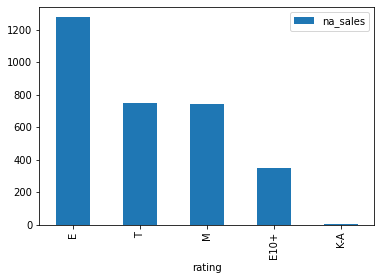

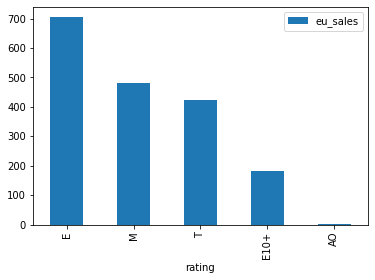

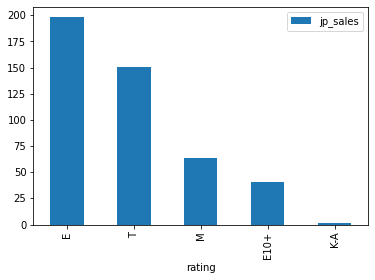

In [92]:
df[df['rating']!='-1'].groupby('rating').agg({'na_sales':'sum'}).sort_values('na_sales', ascending=False).head().plot(kind='bar');
df[df['rating']!='-1'].groupby('rating').agg({'eu_sales':'sum'}).sort_values('eu_sales', ascending=False).head().plot(kind='bar');
df[df['rating']!='-1'].groupby('rating').agg({'jp_sales':'sum'}).sort_values('jp_sales', ascending=False).head().plot(kind='bar');

В интернете нашла расшифровку этих аббревиатур:
«E» («Everyone») — «Для всех
«T» («Teen») — «Подросткам
«M» («Mature») — «Для взрослых»
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
«AO» («Adults Only 18+») — «Только для взрослых»

Судя по всему, игры "для всех" - самые продаваемые во всех странах. Далее в Америке идет игры "для подростков" на равне с "для взрослых" и «Для всех от 10 лет и старше»

в Европе: так же, но игры "для взрослых" чуть популярнее чем "для подростков"
в Японии: после игры "для подростков" отстают на одну треть от игр "для всех", дальше менее популярные "для взрослых" и «Для всех от 10 лет и старше»

Вывод:
-  Топ 5 Северной Америки и Европы почти не отличается своей номенклатурой по популярным платформам. А в Японии есть знаменитые свои платформы как snes, 3ds.
- в Японии больше средств тратят на ролевые игры, когда как в других странах любят экшен. 
- игры "для всех" - самые продаваемые во всех странах.

### Проверим гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны
- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

***Так как игры на платформе рс существуют уже больше 3 десятилетии, выберем данные из актуального периода.***

In [93]:
xone = actual_period[(actual_period['platform'] == 'xone') & (actual_period['user_score'] > 0)]['user_score']
pc = actual_period[(actual_period['platform'] == 'pc') & (actual_period['user_score'] > 0)]['user_score']

alpha=0.05
results = st.ttest_ind(xone, pc)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Значение pvalue подсказывает, что нулевая гипотеза не отвергнута, значит, пользовательские отзывы Xbox One и PC равны

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковы
- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

In [94]:
action = df[(df['genre'] == 'action') & (df['user_score'] > 0)]['user_score']
sports = df[(df['genre'] == 'sports') & (df['user_score'] > 0)]['user_score']

alpha=0.05
results = st.ttest_ind(action, sports)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, значит, пользовательские отзывы жанров Action и Sports одинаковы. 

### Вывод

Продажи игр на платформах выглядит печально уж как 10 лет. Тем не менее люди играть не перестали и разработчики тоже выпускают игры, хотя делают это более осмотрительно. 
Что мы выяснили:
- из всех платформ потенциально прибыльной является - ps4 - 39%, xone - 19%, psv-3% и 3ds-12%. Вывод был сделан так: где продажи упали не более 2-х раз по сравнению с прошлым годом
- во всей выборке список популярных жанров за актуальный период: экшн - 27%, стрелялки-19%, спорт-15%
    А вот несколько советов для продвижения продаж:
- самая набирающая популярность платформа ps4, по моим прогнозам она будет держаться на плаву еще лет 4-5. Поэтому стоит закупиться играми популярных жанров
- для Северной Америки и Европы стоит выкупить экшн, спорт игры, стрелялки, а для Японии еще добавить ролевые игры.
- не стоит заморачиваться на счет пользовательских отзывов, при покупке больше обращают внимание на оценку критиков.
- что насчет возрастной категории, следует наполнить ряды игр "для всех", "для тинейджеров" и "для взрослых" категории

### Бонус

In [95]:
data_games = pd.read_csv('/datasets/games.csv')

In [96]:
data_games.columns = map(str.lower, data_games.columns)

In [97]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [98]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [99]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [100]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [101]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
# Цветовая гамма не подбиралась специально под платформы, кому-что попадется, 😉      
      
    labels_c=sales.platform
    colours = {'Wii':'C60', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'lightsteelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'Fuchsia', '2600':'C15', 'PSP':'C48', 
               'XOne':'LimeGreen',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

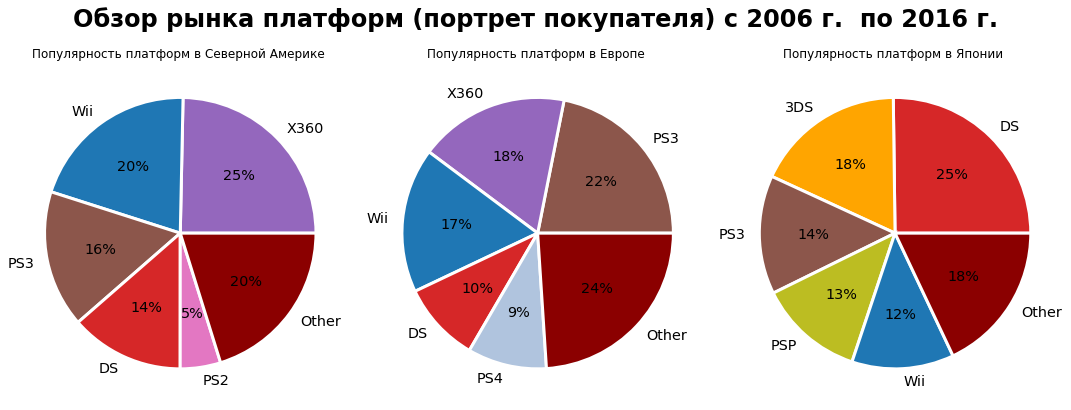

In [102]:
# check
# круги в ряд

x_year = 2006

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

Оптимальный период для исследования 2014-2016 гг., т.к. данные за 2016 г. неполные

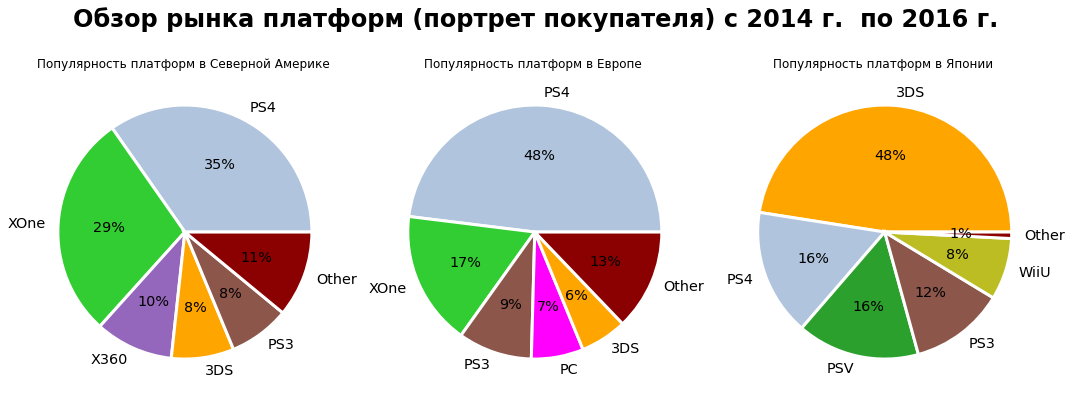

In [103]:
# check
# круги в ряд

x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

2015 год взят для акцентирования на изменении доли в продажах современных платформ

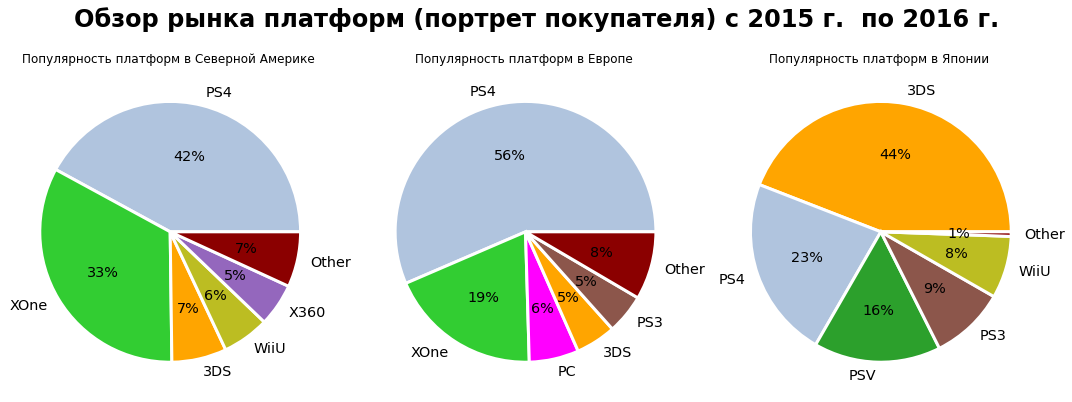

In [104]:
# check
# круги в ряд

x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])